In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.applications import ResNet152V2, NASNetLarge	
from tensorflow.keras.models import Model, Sequential
import numpy as np
from utils import *
import os

In [ ]:
image_resize = (520, 704)
image_resize = (331, 331)
batch_size = 128
train_data_dir = "/content/drive/My Drive/train_reorganize/image"
root_path = "/content/drive/My Drive/"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.01,
                                   rotation_range=10,
                                   validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
                                                    train_data_dir,
                                                    shuffle=True,
                                                    target_size=image_resize,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    classes=('cort', 'shsy5y', 'astro'),
                                                    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
                                                        train_data_dir, # same directory as training data
                                                        shuffle=False,
                                                        target_size=image_resize,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                        classes=('cort', 'shsy5y', 'astro'),
                                                        subset='validation') # set as validation data

Found 2627 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [ ]:
keras.backend.clear_session()
resnet = NASNetLarge(include_top=False, weights='imagenet', pooling='avg', input_shape=image_resize + (3,))
model = Sequential()
model.add(resnet)
model.add(layers.BatchNormalization())
model.add(layers.Dense(3, activation='softmax'))
model.layers[0].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 4032)              84916818  
                                                                 
 batch_normalization (BatchN  (None, 4032)             16128     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 3)                 12099     
                                                                 
Total params: 84,945,045
Trainable params: 20,163
Non-trainable params: 84,924,882
_________________________________________________________________


In [ ]:
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=5e-4),
              metrics = ['accuracy']) 

In [ ]:
history = TrainHistory()
history.add(model.fit(train_generator,validation_data = validation_generator, epochs = 12).history)

Epoch 1/12
21/21 [==============================] - 132s 5s/step - loss: 0.5081 - accuracy: 0.8047 - val_loss: 0.7167 - val_accuracy: 0.8779
Epoch 2/12
21/21 [==============================] - 101s 5s/step - loss: 0.1997 - accuracy: 0.9421 - val_loss: 0.6051 - val_accuracy: 0.8947
Epoch 3/12
21/21 [==============================] - 101s 5s/step - loss: 0.1419 - accuracy: 0.9604 - val_loss: 0.5360 - val_accuracy: 0.9160
Epoch 4/12
21/21 [==============================] - 101s 5s/step - loss: 0.1156 - accuracy: 0.9635 - val_loss: 0.4791 - val_accuracy: 0.9145
Epoch 5/12
21/21 [==============================] - 100s 5s/step - loss: 0.0961 - accuracy: 0.9703 - val_loss: 0.4309 - val_accuracy: 0.9313
Epoch 6/12
21/21 [==============================] - 100s 5s/step - loss: 0.0845 - accuracy: 0.9756 - val_loss: 0.3740 - val_accuracy: 0.9374
Epoch 7/12
21/21 [==============================] - 100s 5s/step - loss: 0.0768 - accuracy: 0.9779 - val_loss: 0.3434 - val_accuracy: 0.9405
Epoch 8/12
21

In [ ]:
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics = ['accuracy'])

history.add(model.fit(train_generator,validation_data = validation_generator, epochs = 10).history)

Epoch 1/10
21/21 [==============================] - 127s 5s/step - loss: 0.0407 - accuracy: 0.9882 - val_loss: 0.0787 - val_accuracy: 0.9802
Epoch 2/10
21/21 [==============================] - 99s 5s/step - loss: 0.0413 - accuracy: 0.9855 - val_loss: 0.0745 - val_accuracy: 0.9786
Epoch 3/10
21/21 [==============================] - 99s 5s/step - loss: 0.0390 - accuracy: 0.9890 - val_loss: 0.0626 - val_accuracy: 0.9863
Epoch 4/10
21/21 [==============================] - 99s 5s/step - loss: 0.0373 - accuracy: 0.9886 - val_loss: 0.0617 - val_accuracy: 0.9817
Epoch 5/10
21/21 [==============================] - 99s 5s/step - loss: 0.0342 - accuracy: 0.9905 - val_loss: 0.0600 - val_accuracy: 0.9771
Epoch 6/10
21/21 [==============================] - 99s 5s/step - loss: 0.0336 - accuracy: 0.9901 - val_loss: 0.0547 - val_accuracy: 0.9832
Epoch 7/10
21/21 [==============================] - 99s 5s/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0558 - val_accuracy: 0.9771
Epoch 8/10
21/21 [=

In [ ]:
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=5e-5),
              metrics = ['accuracy'])

history.add(model.fit(train_generator,validation_data = validation_generator, epochs = 5).history)

Epoch 1/5
21/21 [==============================] - 129s 5s/step - loss: 0.0364 - accuracy: 0.9871 - val_loss: 0.0540 - val_accuracy: 0.9817
Epoch 2/5
21/21 [==============================] - 100s 5s/step - loss: 0.0326 - accuracy: 0.9912 - val_loss: 0.0539 - val_accuracy: 0.9847
Epoch 3/5
21/21 [==============================] - 102s 5s/step - loss: 0.0364 - accuracy: 0.9893 - val_loss: 0.0516 - val_accuracy: 0.9863
Epoch 4/5
21/21 [==============================] - 101s 5s/step - loss: 0.0373 - accuracy: 0.9901 - val_loss: 0.0429 - val_accuracy: 0.9817
Epoch 5/5
21/21 [==============================] - 101s 5s/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0428 - val_accuracy: 0.9908


In [ ]:
history.train_history_plot('NASNetLarge', 0.99)
history.to_file(os.path.join(root_path, 'NASNetLarge.txt'))
model.save_weights(os.path.join(root_path, 'NASNetLarge_train.h5'))

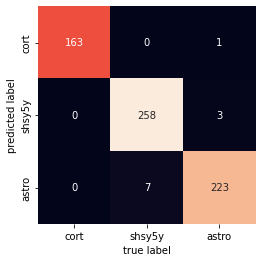

In [ ]:
model.load_weights(os.path.join(root_path, 'NASNetLarge_train.h5'))
predict = model.predict(validation_generator)
predict_label = np.argmax(predict, axis=1)
true_label=validation_generator.labels

get_confusion_matrix(list(validation_generator.class_indices.keys()), true_label, predict_label)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.01,
                                   rotation_range=10)

train_generator = train_datagen.flow_from_directory(
                                                    train_data_dir,
                                                    shuffle=True,
                                                    target_size=image_resize,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    classes=('cort', 'shsy5y', 'astro')) # set as training data
keras.backend.clear_session()
resnet = NASNetLarge(include_top=False, weights='imagenet', pooling='avg', input_shape=image_resize + (3,))
model = Sequential()
model.add(resnet)
model.add(layers.BatchNormalization())
model.add(layers.Dense(3, activation='softmax'))
model.layers[0].trainable = False

model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=5e-4),
              metrics = ['accuracy'])
model.fit(train_generator, epochs = 15)
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics = ['accuracy'])
model.fit(train_generator, epochs = 5)
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics = ['accuracy'])
model.fit(train_generator, epochs = 5)

Found 3282 images belonging to 3 classes.
Epoch 1/15
26/26 [==============================] - 123s 4s/step - loss: 0.5139 - accuracy: 0.8004
Epoch 2/15
26/26 [==============================] - 101s 4s/step - loss: 0.1752 - accuracy: 0.9439
Epoch 3/15
26/26 [==============================] - 100s 4s/step - loss: 0.1269 - accuracy: 0.9607
Epoch 4/15
26/26 [==============================] - 100s 4s/step - loss: 0.1028 - accuracy: 0.9665
Epoch 5/15
26/26 [==============================] - 98s 4s/step - loss: 0.0832 - accuracy: 0.9720
Epoch 6/15
26/26 [==============================] - 99s 4s/step - loss: 0.0823 - accuracy: 0.9729
Epoch 7/15
26/26 [==============================] - 99s 4s/step - loss: 0.0702 - accuracy: 0.9765
Epoch 8/15
26/26 [==============================] - 99s 4s/step - loss: 0.0673 - accuracy: 0.9811
Epoch 9/15
26/26 [==============================] - 100s 4s/step - loss: 0.0579 - accuracy: 0.9848
Epoch 10/15
26/26 [==============================] - 100s 4s/step - los

In [ ]:
model.save_weights(os.path.join(root_path, 'NASNetLarge.h5'))